<div style="color:white; background-color: black; padding: 20px; border-radius:8px; font-size:26px"><b style="font-weight: 700;"><center>LEARNING NLP </center></b></div>


<div style="color:white; background-color: black; padding: 20px; border-radius:8px; font-size:20px"><b style="font-weight: 700;"><center> Text Classification </center></b></div>

## <a id='1'>1. Using Bag of Words </a>


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
temp_df = pd.read_csv('D:/git/Laboratory/NLP/Learning_NLP/data/IMDB Dataset.csv')

In [4]:
# Get the first 10000 rows of temp_df
df = temp_df.iloc[:10000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [6]:
df['sentiment'].value_counts()

sentiment
positive    5028
negative    4972
Name: count, dtype: int64

In [7]:
# Search for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
# Search for duplicates
df.duplicated().sum()

17

In [11]:
# Lets drop the duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

C:\Users\luthi\AppData\Local\Temp\ipykernel_8960\1440087712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


0

**Lets do some basic preprocessing:**
- Remove tags
- Lowercase
- Remove stopwords

In [12]:
# Remove tags
import re

def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [15]:
df['review'] = df['review'].apply(remove_tags)
df

C:\Users\luthi\AppData\Local\Temp\ipykernel_8960\3653777268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [16]:
# set text in lower case
df['review'] = df['review'].apply(lambda x:x.lower())
df

C:\Users\luthi\AppData\Local\Temp\ipykernel_8960\4246960694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x:x.lower())


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
9995,"fun, entertaining movie about wwii german spy ...",positive
9996,give me a break. how can anyone say that this ...,negative
9997,this movie is a bad movie. but after watching ...,negative
9998,this is a movie that was probably made to ente...,negative


In [18]:
# remove stopwords
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

df

C:\Users\luthi\AppData\Local\Temp\ipykernel_8960\2004513663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive
...,...,...
9995,"fun, entertaining movie wwii german spy (julie...",positive
9996,"give break. anyone say ""good hockey movie""? kn...",negative
9997,movie bad movie. watching endless series bad h...,negative
9998,"movie probably made entertain middle school, e...",negative


**Lets separate text and target in dataset:**

In [19]:
# Separate text and target
X = df.iloc[:, 0:1]
y = df['sentiment']

display(X)
display(y)

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production. filming technique...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."
...,...
9995,"fun, entertaining movie wwii german spy (julie..."
9996,"give break. anyone say ""good hockey movie""? kn..."
9997,movie bad movie. watching endless series bad h...
9998,"movie probably made entertain middle school, e..."


0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 9983, dtype: object

**Lets encode the target:**

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

print(y)

[1 1 1 ... 0 0 1]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,test_size = 0.2,
                                                    random_state = 1)

print(X_train.shape)

(7986, 1)


**Apply BoW:**

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [23]:
X_train_bow.shape

(7986, 48282)

### 🟠 **Naive Bayes algorithm** 🟠

Naive Bayes is a family of probabilistic algorithms that are based on applying Bayes' theorem with the "naive" assumption of independence between every pair of features.
- **Gaussian Naive Bayes**:
    The term "Gaussian" in GaussianNB indicates that it's specifically designed for data that follows a Gaussian (normal) distribution.
    *Gaussian Naive Bayes assumes that the features are continuous and follow a Gaussian distribution*. It *also assumes that features are independent of each other* given the class.
    - **Training Phase:**
        During the training phase, GaussianNB *estimates the mean and standard deviation of each feature for each class* in the dataset.

    - **Probability Calculation:**
        *To make a prediction, GaussianNB calculates the conditional probability of each feature value given a class*. This is done using the probability density function of the normal distribution.

    - **Class Prediction:**
        Once the conditional probabilities are calculated for each feature, *the final class prediction is made by combining these probabilities using Bayes' theorem*.

    - **Decision Rule:**
        The decision rule of Gaussian Naive Bayes is *to choose the class with the highest posterior probability*.


- **Multinomial Naive Bayes**:
    Multinomial Naive Bayes is used for *classification tasks*, particularly in cases where *the features are discrete and represent counts*.
    In Multinomial Naive Bayes, the features are typically represented as counts. This is often encountered in text classification tasks, where the features might represent the frequency of each word in a document.
    - **Probability Model**:
        It models the probability of observing a particular count for each feature, given a class label.

    - **Assumption of Feature Independence**:
        Like basic Naive Bayes, Multinomial Naive Bayes assumes that the features are independent of each other given the class label. This assumption simplifies the calculation of probabilities.

    - **Parameter Estimation**:
        The algorithm needs to estimate the probabilities needed for classification. For Multinomial Naive Bayes, this involves estimating the probability of observing each count for each feature, given each class label.

    - **Classification**:
        To classify a new sample, the algorithm uses Bayes' theorem to compute the conditional probability of each class given the observed counts. It then selects the class with the highest probability as the predicted class.

    - **Smoothing**:
        In practice, to handle cases where a feature count in a particular class is zero, a smoothing technique like Laplace smoothing (additive smoothing) is often applied. This ensures that even features not seen in training data have a non-zero probability.

    - **Use Cases**:
        - Multinomial Naive Bayes is commonly used in natural language processing tasks, such as text classification, spam filtering, sentiment analysis, and document categorization.

        - It's also used in other domains where data is represented as discrete counts, such as image classification based on histograms of oriented gradients (HOG).

    - **Limitations**:
        - It assumes feature independence, which may not hold in all cases.
        - It can be sensitive to the scale of the features.
        - It may not perform well on tasks where the features are not well represented as counts.

**Apply Naive Bayes to data with BoW:**

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_bow, y_train)

GaussianNB()

In [25]:
y_pred = gnb.predict(X_test_bow)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accurary score for Naive Bayes in test data:')
accuracy_score(y_test, y_pred)

Accurary score for Naive Bayes in test data:


0.6324486730095142

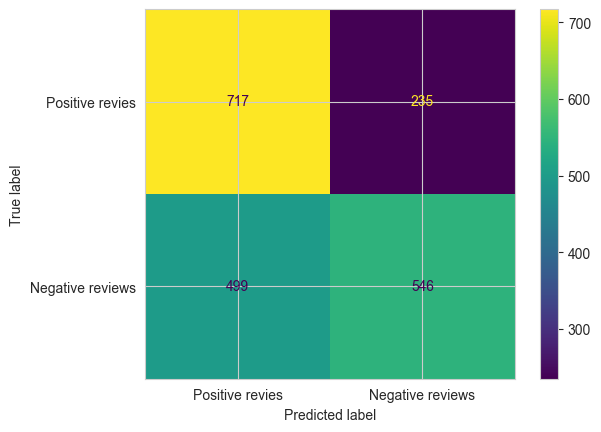

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
                        gnb,
                        X_test_bow,
                        y_test,
                        values_format='d',
                        display_labels=['Positive reviews','Negative reviews'])

**<span style="color:#028553; font-size: 15pt"> Some extra Notes about the Confusion Matrix </span>**

<span style="color:#028553"> Plotting a confusion matrix allow us to have a clear and quick insight to our model performance.
It is very easy to interpretate the result from a confusion matrix, basically the 'y-axis' represents the true label and 'x-axis' represents the predicted label. </span>

<span style="color:#028553"> From the confusion matrix, we calculate the Sensitivity (Recall), the Precision and the Specificity: </span>

<span style="color:#028553"> **Sensitivity**, also known as Recall or True Positive Rate, measures the proportion of actual positives that are correctly predicted as positives. It's especially important when correctly identifying positives is crucial. </span>

 $$\text{Sensitivity} =  \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

<span style="color:#028553"> In the experimental example, our model predicted a total of 1216 Positive Reviews, from which 171 of them are correctly predicted and 499 of them are wrongly predicted. Therefore, the Sensitivity will be aprox. 0.5896 $\approx \frac{717}{(717 + 499)}$  meaning that the model correctly predicted 59% approx. of the actual positives. </span>

<span style="color:#028553"> **Specificity**, also known as the True Negative Rate (TNR), is a metric used in binary classification tasks. It measures the proportion of actual negatives that are correctly predicted as negatives. Specificity is an important metric, especially in situations where correctly identifying negatives is critical, such as in medical diagnoses (where false negatives can be particularly costly). It provides a complementary view to sensitivity (True Positive Rate), and both metrics together give a more comprehensive evaluation of a binary classification model's performance. </span>
$$\text{Specificity} =  \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}}$$

<span style="color:#028553">  In the experimental example, our model predicted a total of 781 of Negative Reviews, from which 546 of them are correctly predicted and 235 of them are wrongly predicted. Therefore, the Specificity will be aprox. $0.5225 \approx \frac{546}{546 + 499}$  meaning that the model correctly predicted 52% approx. of the actual negative reviews </span>

<span style="color:#028553"> **Precision** measures the proportion of true positives among all positive predictions made by the model. It's particularly important when minimizing false positives is crucial. </span>
$$\text{Precision} =  \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

<span style="color:#028553"> In the experimental example, the Precision is approx. $0.5896 \approx \frac{717}{717 + 499}$, meaning that among all the instances predicted as positive, 59% approx. were actually positive. </span>

**Apply Random Forest Classifier to data with BoW:**

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_bow, y_train)

y_pred = rf.predict(X_test_bow)

print('Accurary score for Random Forest Classifier in test data:')
print(accuracy_score(y_test,y_pred))

Accurary score for Random Forest Classifier in test data:
0.8442663995993991


**Apply Bag of Words to data using `max_features` :**

`max_features`:
    - This parameter is an integer value that represents the maximum number of features (words) to keep in the vocabulary.
    - The vocabulary if build based on the frequency of words in the corpus, and `max_features` restricts the number of words to be considered.
    - It helps in limiting the size of the vocabulary and can be useful in situations where you want to focus on the most frequent words or reduce memory usage.


In [32]:
cv = CountVectorizer(max_features = 3000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

**Apply Random Forest Classifier to data with BoW:**

In [33]:
rf = RandomForestClassifier()

rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_test_bow)

print('Accurary score for Random Forest Classifier in test data:')
print(accuracy_score(y_test,y_pred))

Accurary score for Random Forest Classifier in test data:
0.8357536304456685


## <a id='2'>2. Using N_Gram </a>


In [34]:
cv = CountVectorizer(ngram_range = (1,2))      # <--- the CountVectorizer will consider both unigrams (single words) and bigrams (pairs of consecutive words) during tokenization.

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

**Apply Random Forest Classifier to data with n-grams:**

In [35]:
rf = RandomForestClassifier()

rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_test_bow)

print('Accurary score for Random Forest Classifier in test data:')
print(accuracy_score(y_test,y_pred))

Accurary score for Random Forest Classifier in test data:
0.8457686529794692


## <a id='3'>3. Using Tf-idf </a>

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review']).toarray()

In [37]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)

print('Accurary score for Random Forest Classifier in test data:')
print(accuracy_score(y_test,y_pred))

Accurary score for Random Forest Classifier in test data:
0.8477716574862293


## <a id='4'>4. Using Word2Vec </a>

In [40]:
# Get the first 10000 rows of temp_df
df = temp_df.iloc[:10000]

1. **Drop duplicates from data:**

2. **Lets do some basic preprocessing:**
    - Remove tags
    - Lowercase
    - Remove stopwords

In [41]:
# Lets drop the duplicates
df.drop_duplicates(inplace = True)

# Delete the tag characters
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text
df['review'] = df['review'].apply(remove_tags)

# set text in lower case
df['review'] = df['review'].apply(lambda x:x.lower())

# Remove stopwords
sw_list = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

C:\Users\luthi\AppData\Local\Temp\ipykernel_8960\3200671228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)
C:\Users\luthi\AppData\Local\Temp\ipykernel_8960\3200671228.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)
C:\Users\luthi\AppData\Local\Temp\ipykernel_8960\3200671228.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

3. **Load, tokenize and apply basic preprocessing to the Games of Thrones Books**

In [42]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [43]:
story = []
for doc in df['review']:
    raw_sent = sent_tokenize(doc)  # --->  Uses sent_tokenize to tokenize the 'corpus' into individual sentences.
    for sent in raw_sent:
        story.append(simple_preprocess(sent))  # --->  Tokenize and basic preprocessing tasks to each sentence.

4. **Train and apply Word2Vec on data**

In [44]:
# Instantiate the Word2vec model
model = gensim.models.Word2Vec(window = 10,
                               min_count = 2)

In [45]:
# Create the Vocabulary of "story" based on 'model'
model.build_vocab(story)

In [46]:
# Train the Word2Vec model on data
model.train(story,
            total_examples = model.corpus_count,
            epochs = model.epochs)

(5876438, 6212140)

In [47]:
# Length of list of words (or keys) in the vocabulary
len(model.wv.index_to_key)

31845

In [48]:
# Remove out-of-vocabulary words
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis = 0)

In [49]:
document_vector(df['review'].values[0])

array([-0.14418341,  0.47559392,  0.19515002,  0.23836182, -0.05655508,
       -0.5526392 ,  0.2441254 ,  0.9483166 , -0.35702422, -0.19181404,
       -0.32290387, -0.45217296,  0.06173041,  0.04412324,  0.16994618,
       -0.11078908,  0.03557588, -0.39107296, -0.02212032, -0.63197136,
        0.03777236,  0.21918067,  0.06501037, -0.2923352 , -0.32986078,
       -0.03946289, -0.2850879 ,  0.06176826, -0.30822036,  0.02323546,
        0.39207152,  0.01210418,  0.1554405 , -0.31300798, -0.18270425,
        0.3628268 ,  0.08114345, -0.4453991 , -0.23205557, -0.77038664,
        0.10267307, -0.24430223,  0.05880289, -0.0329139 ,  0.48006156,
       -0.11530486, -0.24894851, -0.00902762,  0.0545862 ,  0.36617106,
        0.07370886, -0.3451657 , -0.40710917, -0.11891271, -0.15766118,
        0.22964291,  0.17435838,  0.07251796, -0.2903165 ,  0.0796032 ,
        0.0776647 ,  0.11634725,  0.02177638, -0.13428552, -0.48290095,
        0.21030529,  0.02306757,  0.16489877, -0.38148543,  0.23

**taqaddum (tqdm)**

**`tqdm`** is a popular Python library that provides a progress bar for loops or tasks that take a long time to complete. It stands for "taqaddum" which means "progress" in Arabic. Once imported, you can use tqdm to wrap an iterable (like a list, range, or any other iterable object) to monitor the progress of a loop.

**`tqdm`** is especially useful when you have loops that may take a significant amount of time to complete, and you want to keep track of the progress. It provides a nice visual feedback for long-running tasks.

In [50]:
from tqdm import tqdm

In [51]:
X = []

for doc in tqdm(df['review'].values):
    X.append(document_vector(doc))

100%|██████████| 9983/9983 [02:00<00:00, 82.98it/s] 


In [52]:
# Set X of type array
X = np.array(X)

# print the shape of the dataset after removing the out-of-vocabulary words
print(X.shape)

(9983, 100)


5. **Encode the target:**

In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])

print(y)

[1 1 1 ... 0 0 1]


6. **Split data into training and test datasets**

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

7.1. **Apply Naive Bayes to data with Word2Vec**

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

mnb = GaussianNB()

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('Accurary score for Naive Bayes in test data with Word2Vec:')
print(accuracy_score(y_test,y_pred))

Accurary score for in test data with Word2Vec:
0.7310966449674512


7.2. **Apply Random Forest to data with Word2Vec**

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

mrf =RandomForestClassifier()

mrf.fit(X_train, y_train)
y_pred = mrf.predict(X_test)

print('Accurary score for Random Forest in test data with Word2Vec:')
print(accuracy_score(y_test,y_pred))

Accurary score for Random Forest in test data with Word2Vec:
0.7731597396094141
